![banner-image](assets/AD-SQUAD.png)

<a id='top'></a>
# Loan Default Prediction

#### Table of Content

<ul>
    <li><a href='#intro'><b>1.0 Introduction</b></a></li>
    <ul style="margin-top: 5px; margin-bottom: 10px;">
        <li style="margin-left: 20px;"><a href='#data-description'>1.1 Problem Statement</a></li>
    </ul>
    <li><a href='#data-selection'><b>2.0 Dataset Selection</b></a></li>
    <ul style="margin-top: 5px; margin-bottom: 10px;">
        <li style="margin-left: 20px;"><a href='#data-description'>2.1 Dataset Description & Relevance</a></li>
        <li style="margin-left: 20px;"><a href='#class-imbalance'>2.2 Nature and Severity of Class Imbalance</a></li>
    </ul>
    <li><a href='#exploratory-analysis'><b>3.0 Exploratory Data Analysis & Initial Preprocessing</b></a></li>
    <ul style="margin-top: 5px; margin-bottom: 10px;">
        <li style="margin-left: 20px;"><a href='#feature-distribution'>3.1 Feature Distribution</a></li>
        <li style="margin-left: 20px;"><a href='#missing-values'>3.2 Missing Values</a></li>
        <li style="margin-left: 20px;"><a href='#outliers'>3.3 Outliers</a></li>
        <li style="margin-left: 20px;"><a href='#eda-conclusion'>3.4 EDA Conclusion</a></li>
    </ul>
    <li><a href='#merging'><b>4.0 Merging & Further Preprocessing</b></a></li>
    <ul style="margin-top: 5px; margin-bottom: 10px;">
        <li style="margin-left: 20px;"><a href='#merge-process'>4.1 Merging</a></li>
        <li style="margin-left: 20px;"><a href='#preprocessing'>4.2 Preprocessing</a></li>
    </ul>
    <li><a href='#feature-engineering'><b>5.0 Feature Engineering</b></a></li>
    <li><a href='#handling-imbalance'><b>6.0 Handling Imbalance</b></a></li>
    <li><a href='#model-development'><b>7.0 Model Development</b></a></li>
    <ul style="margin-top: 5px; margin-bottom: 10px;">
        <li style="margin-left: 20px;"><a href='#model-training'>7.1 Training</a></li>
        <li style="margin-left: 20px;"><a href='#model-evaluation'>7.2 Evaluation</a></li>
    </ul>
    <li><a href='#interpretation'><b>8.0 Interpretation & Discussion</b></a></li>
    <ul style="margin-top: 5px; margin-bottom: 10px;">
        <li style="margin-left: 20px;"><a href='#performance'>8.1 Performance</a></li>
        <li style="margin-left: 20px;"><a href='#tradeoffs'>8.2 Trade-offs</a></li>
        <li style="margin-left: 20px;"><a href='#misclassification'>8.3 Practical Implication of Misclassification</a></li>
        <li style="margin-left: 20px;"><a href='#limitations'>8.4 Limitations of Study</a></li>
    </ul>
    <li><a href='#deployment'><b>9.0 Deployment</b></a></li>
    <li><a href='#conclusion'><b>10.0 Conclusion</b></a></li>
</ul>

<a id='intro'></a>

## 1.0 Introduction

##### 1.1 Problem Definition
Financial institutions need to determine whether a borrower is likely to default on a loan before disbursing funds. Accurately predicting loan default reduces financial risk, improves lending decisions, and supports sustainable portfolio growth.

In this project, the goal is to build and train a machine learning model that predicts whether a loan will be good (1) or bad (0) using customer demographics, previous loan histories, and performance data.

##### 1.2 Target Variable - good_bad_flag
* 1 = good loan (loan was repaid on time)
* 0 = bad loan (loan was not repaid on time)

<a id='data'></a>

## 2.0 Data Description

#### 2.1 Summary

This project consists of three training datasets and three corresponding test datasets. All datasets are linked using the primary key **customerid**.

**Dataset 1:** Demographic Data — traindemographics.csv

* Contains customer profile and background information.

**Dataset 2:** Performance Data — trainperf.csv

* Contains details about the loan we want to predict.
* This dataset provides the label we are predicting.

**Dataset 3:** Previous Loans Data — trainprevloans.csv

* Historical loans for each customer prior to the target loan.
* This helps capture customer risk profile based on past behavior.

#### 2.2 Why Multiple Datasets?
The loan outcome depends not only on the target loan details but also on the customer’s demographics and previous loan behaviour. Therefore, we need to merge these datasets on customerid to build a complete feature set.

In [105]:
# Importing Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [106]:
# Load datasets

demo = pd.read_csv("data/train/traindemographics.csv")
perf = pd.read_csv("data/train/trainperf.csv")
prev = pd.read_csv("data/train/trainprevloans.csv")

In [107]:
demo.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


In [108]:
perf.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good


In [109]:
prev.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


<a id='explore'></a>

## 3.0 Data Exploration

#### 3.1. Inspecting data - _checking shape for demo, pref and prev datasets_

#### 3.2. Checking & Handling Duplicates - _checking & handling duplicate values in customer id in demo and pref_

#### 3.3. Checking & Handling Missing Data - _checking & handling missing values in each dataset_

In [110]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4346 non-null   object 
 1   birthdate                   4346 non-null   object 
 2   bank_account_type           4346 non-null   object 
 3   longitude_gps               4346 non-null   float64
 4   latitude_gps                4346 non-null   float64
 5   bank_name_clients           4346 non-null   object 
 6   bank_branch_clients         51 non-null     object 
 7   employment_status_clients   3698 non-null   object 
 8   level_of_education_clients  587 non-null    object 
dtypes: float64(2), object(7)
memory usage: 305.7+ KB


In [111]:
perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customerid     4368 non-null   object 
 1   systemloanid   4368 non-null   int64  
 2   loannumber     4368 non-null   int64  
 3   approveddate   4368 non-null   object 
 4   creationdate   4368 non-null   object 
 5   loanamount     4368 non-null   float64
 6   totaldue       4368 non-null   float64
 7   termdays       4368 non-null   int64  
 8   referredby     587 non-null    object 
 9   good_bad_flag  4368 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 341.4+ KB


In [112]:
prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       18183 non-null  object 
 1   systemloanid     18183 non-null  int64  
 2   loannumber       18183 non-null  int64  
 3   approveddate     18183 non-null  object 
 4   creationdate     18183 non-null  object 
 5   loanamount       18183 non-null  float64
 6   totaldue         18183 non-null  float64
 7   termdays         18183 non-null  int64  
 8   closeddate       18183 non-null  object 
 9   referredby       1026 non-null   object 
 10  firstduedate     18183 non-null  object 
 11  firstrepaiddate  18183 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1.7+ MB


In [113]:
print("Demographics:", demo.shape)
print("Performance:", perf.shape)
print("Previous Loans:", prev.shape)

Demographics: (4346, 9)
Performance: (4368, 10)
Previous Loans: (18183, 12)


In [114]:
print("Demographics:", demo.dtypes.value_counts())
print("Performance:", perf.dtypes.value_counts())
print("Previous Loans:", prev.dtypes.value_counts())

Demographics: object     7
float64    2
Name: count, dtype: int64
Performance: object     5
int64      3
float64    2
Name: count, dtype: int64
Previous Loans: object     7
int64      3
float64    2
Name: count, dtype: int64


describe the dataset 1 by 1.

In [115]:
#demo.describe()
perf.describe()

,systemloanid,loannumber,loanamount,totaldue,termdays
count,4.368000e+03,4368.000000,4368.000000,4368.000000,4368.000000
mean,3.019810e+08,5.172390,17809.065934,21257.377679,29.261676
std,1.343115e+04,3.653569,10749.694571,11943.510416,11.512519
min,3.019585e+08,2.000000,10000.000000,10000.000000,15.000000
25%,3.019691e+08,2.000000,10000.000000,13000.000000,30.000000
50%,3.019801e+08,4.000000,10000.000000,13000.000000,30.000000
75%,3.019935e+08,7.000000,20000.000000,24500.000000,30.000000
max,3.020040e+08,27.000000,60000.000000,68100.000000,90.000000


#### 3.2.1 Check for Duplicates

In [116]:
print("Demographics:", demo.duplicated("customerid").sum())
print("Performance:", perf.duplicated(["customerid", "systemloanid"]).sum())
print("Previous Loans:", prev.duplicated(["customerid", "systemloanid"]).sum())

Demographics: 12
Performance: 0
Previous Loans: 0


##### 3.2.2 Handling Duplicates in Demo Data

In [117]:
dupes = demo[demo.duplicated(subset="customerid", keep=False)]
dupes

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
138,8a858fca5c35df2c015c39ad8695343e,1980-11-26 00:00:00.000000,Savings,3.352588,7.211089,GT Bank,NaN,Permanent,NaN
159,8a858fca5c35df2c015c39ad8695343e,1980-11-26 00:00:00.000000,Savings,3.352588,7.211089,GT Bank,NaN,Permanent,NaN
272,8a858edd57f790040157ffe9b6ed3fbb,1988-01-18 00:00:00.000000,Other,3.782563,7.171356,First Bank,NaN,Permanent,Secondary
445,8a858e6c5c88d145015c8b9627cd5a48,1979-09-30 00:00:00.000000,Savings,3.367008,6.497313,Sterling Bank,NaN,Permanent,NaN
517,8a858edd57f790040157ffe9b6ed3fbb,1988-01-18 00:00:00.000000,Other,3.782563,7.171356,First Bank,NaN,Permanent,Secondary
750,8a858f965bb63a25015bbf63fd062e2e,1974-02-25 00:00:00.000000,Savings,3.936366,6.817958,Stanbic IBTC,NaN,Permanent,NaN
776,8a858f965bb63a25015bbf63fd062e2e,1974-02-25 00:00:00.000000,Savings,3.936366,6.817958,Stanbic IBTC,NaN,Permanent,NaN
798,8a858fc75cd62882015cdaf2f4311b3f,1975-10-27 00:00:00.000000,Savings,7.437607,9.088935,GT Bank,NaN,Permanent,NaN
1010,8a858fe65675195a015679452588279c,1982-08-01 00:00:00.000000,Savings,7.533646,9.046885,UBA,NaN,Permanent,NaN
1015,8a858fe65675195a015679452588279c,1982-08-01 00:00:00.000000,Savings,7.533646,9.046885,UBA,NaN,Permanent,NaN


In [118]:
# Drop Duplicate Data

demo = demo.drop_duplicates(subset="customerid", keep="first")

#### 3.3.1 Identify Missing Values Early

In [119]:
print("Demographics:", demo.isnull().sum())

Demographics: customerid                       0
birthdate                        0
bank_account_type                0
longitude_gps                    0
latitude_gps                     0
bank_name_clients                0
bank_branch_clients           4283
employment_status_clients      648
level_of_education_clients    3748
dtype: int64


In [120]:
print("Performance:", perf.isnull().sum())

Performance: customerid          0
systemloanid        0
loannumber          0
approveddate        0
creationdate        0
loanamount          0
totaldue            0
termdays            0
referredby       3781
good_bad_flag       0
dtype: int64


In [121]:
print("Previous Loans:", prev.isnull().sum())

Previous Loans: customerid             0
systemloanid           0
loannumber             0
approveddate           0
creationdate           0
loanamount             0
totaldue               0
termdays               0
closeddate             0
referredby         17157
firstduedate           0
firstrepaiddate        0
dtype: int64


#### 3.3.2 Handling Missing Values

* Demographics Dataset:
Bank Branch, Education Level and Employment Status are usually optional fields in a loan application. These categorical fields missing values will be filled with "Unknown".

* Performance Dataset:
Referral field was most likely an optional field. Since this values where were missing due to a lack of information intentionally provided during loan application process, Missing Value Imputation Stategy will be to simply replace missing values with "Unknown"

* Previous Loans Dataset:
Referral field was most likely an optional field. Since this values where were missing due to a lack of information intentionally provided during loan application process, Missing Value Imputation Stategy will be to simply replace missing values with "Unknown"

In [122]:
demo["bank_branch_clients"].fillna("Unknown", inplace=True)
demo["employment_status_clients"].fillna("Unknown", inplace=True)
demo["level_of_education_clients"].fillna("Unknown", inplace=True)

print("Demographics:", demo.isnull().sum())

Demographics: customerid                    0
birthdate                     0
bank_account_type             0
longitude_gps                 0
latitude_gps                  0
bank_name_clients             0
bank_branch_clients           0
employment_status_clients     0
level_of_education_clients    0
dtype: int64


/var/folders/tg/h3wspfc55nb5jzzm6rv1cb_80000gn/T/ipykernel_76788/2977344190.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  demo["bank_branch_clients"].fillna("Unknown", inplace=True)
/var/folders/tg/h3wspfc55nb5jzzm6rv1cb_80000gn/T/ipykernel_76788/2977344190.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

In [123]:
perf["referredby"].fillna("Unknown", inplace=True)

print("Performance:", perf.isnull().sum())

Performance: customerid       0
systemloanid     0
loannumber       0
approveddate     0
creationdate     0
loanamount       0
totaldue         0
termdays         0
referredby       0
good_bad_flag    0
dtype: int64


/var/folders/tg/h3wspfc55nb5jzzm6rv1cb_80000gn/T/ipykernel_76788/3190469138.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  perf["referredby"].fillna("Unknown", inplace=True)


In [124]:
prev["referredby"].fillna("Unknown", inplace=True)

print("Previous Loans:", prev.isnull().sum())

Previous Loans: customerid         0
systemloanid       0
loannumber         0
approveddate       0
creationdate       0
loanamount         0
totaldue           0
termdays           0
closeddate         0
referredby         0
firstduedate       0
firstrepaiddate    0
dtype: int64


/var/folders/tg/h3wspfc55nb5jzzm6rv1cb_80000gn/T/ipykernel_76788/1461187509.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  prev["referredby"].fillna("Unknown", inplace=True)


In [125]:
print("Remaining missing values in demographics:", demo.isnull().sum().sum())
print("Remaining missing values in performance:", perf.isnull().sum().sum())
print("Remaining missing values in previous loans:", prev.isnull().sum().sum())

Remaining missing values in demographics: 0
Remaining missing values in performance: 0
Remaining missing values in previous loans: 0


<a id='merge'></a>

## 4.0 Merge data

**Objective:** We need to merge all 3 datasets.

* Performance (trainpref) is the MAIN dataset since it contains the TARGET (good_bad_flag). 

**Note:** *Since Previous Loan Dataset can contain multiple previous loans for each customer, meaning the data here will have a 1-to-many format. To keep this dataset in a 1 row per customer format, we must summarize(aggregate) the previous loans dataset (1-to-1 format)*

* Step 1: Merge Performace and Demographics
* Step 2: Prepare Previous Loans Dataset
* Step 3: Aggregated Previous Loan History per Customer
* Step 4: Merge Aggregate to (Performance and Demographics) dataframe

#### 4.1 Merge Performace and Demographics

In [126]:
# STEP 1: PERFORMANCE + DEMOGRAPHICS

df = perf.merge(demo, on="customerid", how="left")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4368 non-null   object 
 1   systemloanid                4368 non-null   int64  
 2   loannumber                  4368 non-null   int64  
 3   approveddate                4368 non-null   object 
 4   creationdate                4368 non-null   object 
 5   loanamount                  4368 non-null   float64
 6   totaldue                    4368 non-null   float64
 7   termdays                    4368 non-null   int64  
 8   referredby                  4368 non-null   object 
 9   good_bad_flag               4368 non-null   object 
 10  birthdate                   3269 non-null   object 
 11  bank_account_type           3269 non-null   object 
 12  longitude_gps               3269 non-null   float64
 13  latitude_gps                3269 

#### 4.2 Prepare Previous Loans Dataset

In [127]:
# Converting date columns to Datetime Dtye

prev['approveddate'] = pd.to_datetime(prev['approveddate'])
prev['creationdate'] = pd.to_datetime(prev['creationdate'])
prev['closeddate'] = pd.to_datetime(prev['closeddate'])
prev['firstduedate'] = pd.to_datetime(prev['firstduedate'])
prev['firstrepaiddate'] = pd.to_datetime(prev['firstrepaiddate'])

In [128]:
# New column: repayment delay = firstrepaiddate - firstduedate

prev['repayment_delay'] = (prev['firstrepaiddate'] - prev['firstduedate']).dt.days

#### 4.3 Aggregated Previous Loan History per Customer

In [129]:
# STEP 3: AGGREGATED PREVIOUS LOAN HISTORY PER CUSTOMER

agg_prev = prev.groupby("customerid").agg({
    "systemloanid": "count",
    "loanamount": ["mean", "max"],
    "totaldue": ["mean"],
    "termdays": ["mean", "max"],
    "repayment_delay": ["mean"],
})

agg_prev.columns = ["_".join(col) for col in agg_prev.columns]
agg_prev.head()

,systemloanid_count,loanamount_mean,loanamount_max,totaldue_mean,termdays_mean,termdays_max,repayment_delay_mean
customerid,,,,,,,
8a1088a0484472eb01484669e3ce4e0b,1,10000.000000,10000.0,11500.000000,15.000000,15,6.000000
8a1a1e7e4f707f8b014f797718316cad,4,17500.000000,30000.0,22375.000000,37.500000,60,-0.250000
8a1a32fc49b632520149c3b8fdf85139,7,12857.142857,20000.0,15214.285714,19.285714,30,-0.428571
8a1eb5ba49a682300149c3c068b806c7,8,16250.000000,30000.0,20300.000000,33.750000,60,-3.125000
8a1edbf14734127f0147356fdb1b1eb2,2,10000.000000,10000.0,12250.000000,22.500000,30,-4.000000


#### 4.4 Merge Aggregate to (Performance and Demographics) dataframe

In [130]:
# STEP 4: MERGE AGGREGATE PREVIOUS-LOANS STATISTICS TO (PERFORMANCE + DEMOGRAPHICS) DATAFRAME

df = df.merge(agg_prev, on="customerid", how="left")

df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,...,bank_branch_clients,employment_status_clients,level_of_education_clients,systemloanid_count,loanamount_mean,loanamount_max,totaldue_mean,termdays_mean,termdays_max,repayment_delay_mean
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,Unknown,Good,...,Unknown,Permanent,Post-Graduate,11.0,18181.818182,30000.0,22081.818182,30.0,30.0,-0.909091
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,Unknown,Good,...,"DUGBE,IBADAN",Permanent,Graduate,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,Unknown,Good,...,Unknown,Permanent,Unknown,6.0,10000.000000,10000.0,11750.000000,17.5,30.0,0.833333
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,Unknown,Good,...,Unknown,Permanent,Unknown,2.0,10000.000000,10000.0,12250.000000,22.5,30.0,7.500000
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,Unknown,Good,...,Unknown,Permanent,Primary,8.0,18750.000000,30000.0,23550.000000,37.5,60.0,-3.125000


*Now we have our fully merged dataset and we can prepare it for training*

In [131]:
# SAVE MERGED CSV (BEFORE PREPROCESSING)
df.to_csv("train_merged.csv")

<a id='process'></a>

## 5.0 Data Preprocessing

* Step 1: Handling Missing Values
* Step 2: Cross-Checking for Duplicate
* Step 3: Encoding Categoricals
* Step 4: Feature Engineering
* Step 5: Outleirs
* Step 6: Handling Data Imbalance


#### 5.1 Handling Missing Values

In [132]:
df.isna().sum()

customerid                       0
systemloanid                     0
loannumber                       0
approveddate                     0
creationdate                     0
loanamount                       0
totaldue                         0
termdays                         0
referredby                       0
good_bad_flag                    0
birthdate                     1099
bank_account_type             1099
longitude_gps                 1099
latitude_gps                  1099
bank_name_clients             1099
bank_branch_clients           1099
employment_status_clients     1099
level_of_education_clients    1099
systemloanid_count               9
loanamount_mean                  9
loanamount_max                   9
totaldue_mean                    9
termdays_mean                    9
termdays_max                     9
repayment_delay_mean             9
dtype: int64

From here you can see there are 2 types of missing values.

1. Missing demographics data which will be imputed with "Unknown"
2. Missing previous-loan aggregated metrics (9 missing)

In [133]:
demo_cols = [
    'bank_account_type', 'longitude_gps', 'latitude_gps',
    'bank_name_clients', 'bank_branch_clients', 'employment_status_clients',
    'level_of_education_clients'
]

for col in demo_cols:
    df[col] = df[col].fillna("Unknown")

In [134]:
# impute birthday with 1900-01-01 and also create a new column to flag it as missing or not.

df["birthdate"] = df["birthdate"].fillna(pd.Timestamp("1900-01-01"))

If a customers aggregated values are missing then they do not have previous loans. Hence we impute with 0.

In [135]:
df['systemloanid_count'] = df['systemloanid_count'].fillna(0)

In [136]:
num_cols = [
    'loanamount_mean', 'loanamount_max', 'totaldue_mean',
    'termdays_mean', 'termdays_max', 'repayment_delay_mean'
]

for col in num_cols:
    df[col] = df[col].fillna(0)

In [137]:
df.isna().sum()

customerid                    0
systemloanid                  0
loannumber                    0
approveddate                  0
creationdate                  0
loanamount                    0
totaldue                      0
termdays                      0
referredby                    0
good_bad_flag                 0
birthdate                     0
bank_account_type             0
longitude_gps                 0
latitude_gps                  0
bank_name_clients             0
bank_branch_clients           0
employment_status_clients     0
level_of_education_clients    0
systemloanid_count            0
loanamount_mean               0
loanamount_max                0
totaldue_mean                 0
termdays_mean                 0
termdays_max                  0
repayment_delay_mean          0
dtype: int64

#### 5.2 Handling for Duplicates

#### 5.3 Encoding Categoricals

In [138]:
cat_cols = ["bank_account_type", "bank_name_clients","bank_branch_clients", "employment_status_clients",
            "level_of_education_clients"]

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [139]:
# Compare before and after

#df_encoded.shape

In [140]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 82 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   customerid                                                                          4368 non-null   object 
 1   systemloanid                                                                        4368 non-null   int64  
 2   loannumber                                                                          4368 non-null   int64  
 3   approveddate                                                                        4368 non-null   object 
 4   creationdate                                                                        4368 non-null   object 
 5   loanamount                                                                          4368 non-null

In [141]:
# ENCODING 

df_encoded["good_bad_flag"] = df_encoded["good_bad_flag"].map({"Good": 0, "Bad": 1})

#### 5.4 Feature Engineering

In [142]:
# DROP IDENTIFIERS and NON CRITICAL Data

df_encoded = df_encoded.drop(columns=["customerid", "systemloanid","referredby","longitude_gps","latitude_gps"])

In [143]:
# LOAN CREATION => APPROVAL DELAY
# This shows how long it took to approve the loan. Could indicate speed of processing for cerain customers

df_encoded["creationdate"] = pd.to_datetime(df_encoded["creationdate"])
df_encoded["approveddate"] = pd.to_datetime(df_encoded["approveddate"])

df_encoded["loan_creation_to_approval_days"] = (df_encoded["approveddate"] - df_encoded["creationdate"]).dt.days

In [144]:
# AGE IS OFTEN PREDICTIVE
df_encoded["birthdate"] = pd.to_datetime(df_encoded["birthdate"])

df_encoded["customer_age"] = (pd.to_datetime("today") - df_encoded["birthdate"]).dt.days // 365

In [145]:
# DROP ORIGINAL DATES

df_encoded = df_encoded.drop(columns=["approveddate","creationdate","birthdate"])

In [146]:
#NUMERIC TRANSFORMATIONS
#Loan ratio: How much is the total due compared to the original loan amount

#df["totaldue_to_loanamount_ratio"] = df["totaldue"] / df["loanamount"]

In [147]:
#Loan term in months: Easier to interpret than days

#df["termdays_months"] = df["termdays"] / 30

#### 5.5 Handling Outliers

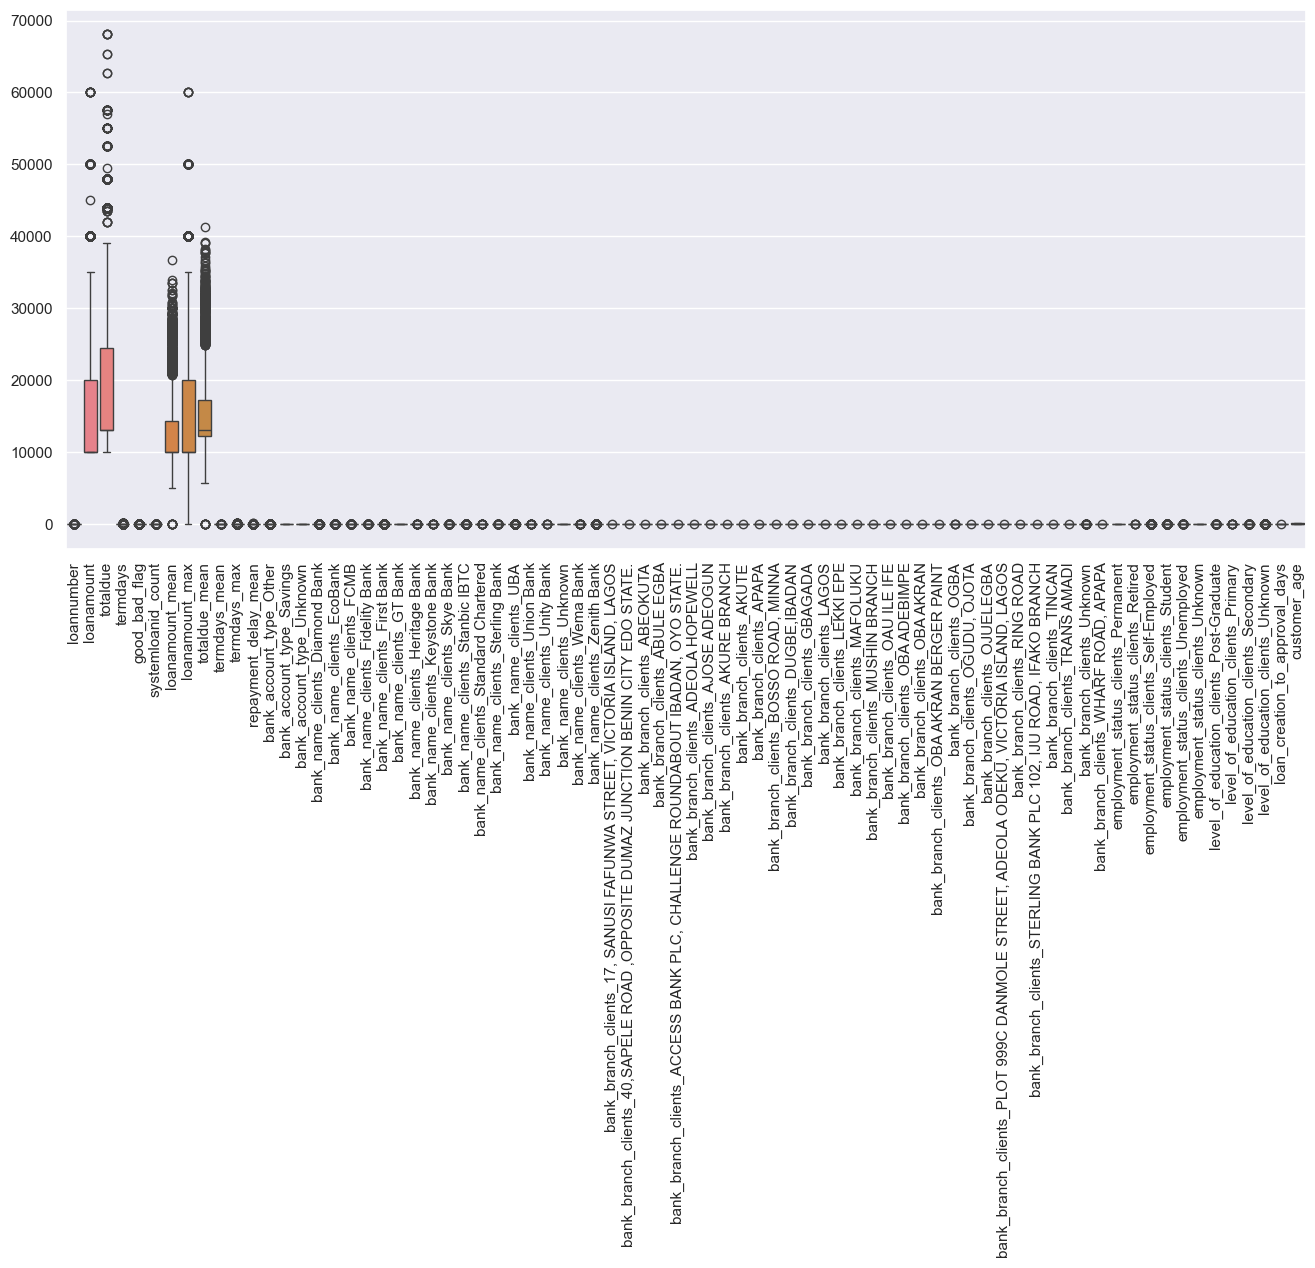

In [148]:
sns.set_theme(style='darkgrid', palette='muted')
fig, ax = plt.subplots(figsize=(16,7))
sns.boxplot(data=df_encoded)
plt.xticks(rotation=90);

#### 5.6 Handling Data Imbalance

In [149]:
X = df_encoded.drop("good_bad_flag", axis=1)
y = df_encoded["good_bad_flag"]

In [150]:
proportions = y.value_counts(normalize=True)

print("Class Distribution:")
print(f"Good (0): {proportions[0]:.4f}")
print(f"Bad  (1): {proportions[1]:.4f}")

Class Distribution:
Good (0): 0.7821
Bad  (1): 0.2179


#### Visualize Data Imbalance - Good vs Bad

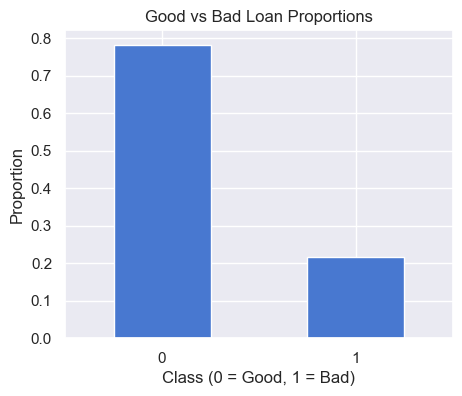

In [151]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
proportions.plot(kind='bar')

plt.title("Good vs Bad Loan Proportions")
plt.xlabel("Class (0 = Good, 1 = Bad)")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.show()

#### Handling Data Imbalance with Borderline Smote

In [152]:
from imblearn.over_sampling import BorderlineSMOTE

# Apply Borderline-SMOTE
sm = BorderlineSMOTE(kind="borderline-1", random_state=42)
X_res, y_res = sm.fit_resample(X, y)

print("After Borderline-SMOTE:")
print(y_res.value_counts(normalize=True))

After Borderline-SMOTE:
good_bad_flag
0    0.5
1    0.5
Name: proportion, dtype: float64


In [153]:
# Random Undersampling
#An alternative class imbalance handling strategy that reduces the majority class.

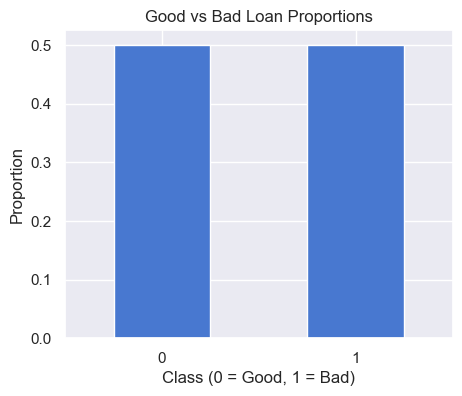

In [154]:
proportions_after = y_res.value_counts(normalize=True)
plt.figure(figsize=(5,4))
proportions_after.plot(kind='bar')
plt.title("Good vs Bad Loan Proportions")
plt.xlabel("Class (0 = Good, 1 = Bad)")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.show()

## Feature Exploration
##### corr heatmap, initial importance

In [155]:
### THIS IS THE SAME AS EDA AND NEEDS TO BE DONE BEFORE PREPROCESSING.

## 6.0 Training

* STEP 1: Split data into training and validation sets
* STEP 2: Select Models. We Select 3 models of different families
* STEP 3: Training Each Model

##### Splitting Data into Training and Validation Sets

In [156]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

In [157]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

print(f"Original: {X_train.shape}")
print(f"Undersampled: {X_train_rus.shape}")
print(pd.Series(y_train_rus).value_counts())

Original: (5465, 75)
Undersampled: (5464, 75)
good_bad_flag
0    2732
1    2732
Name: count, dtype: int64


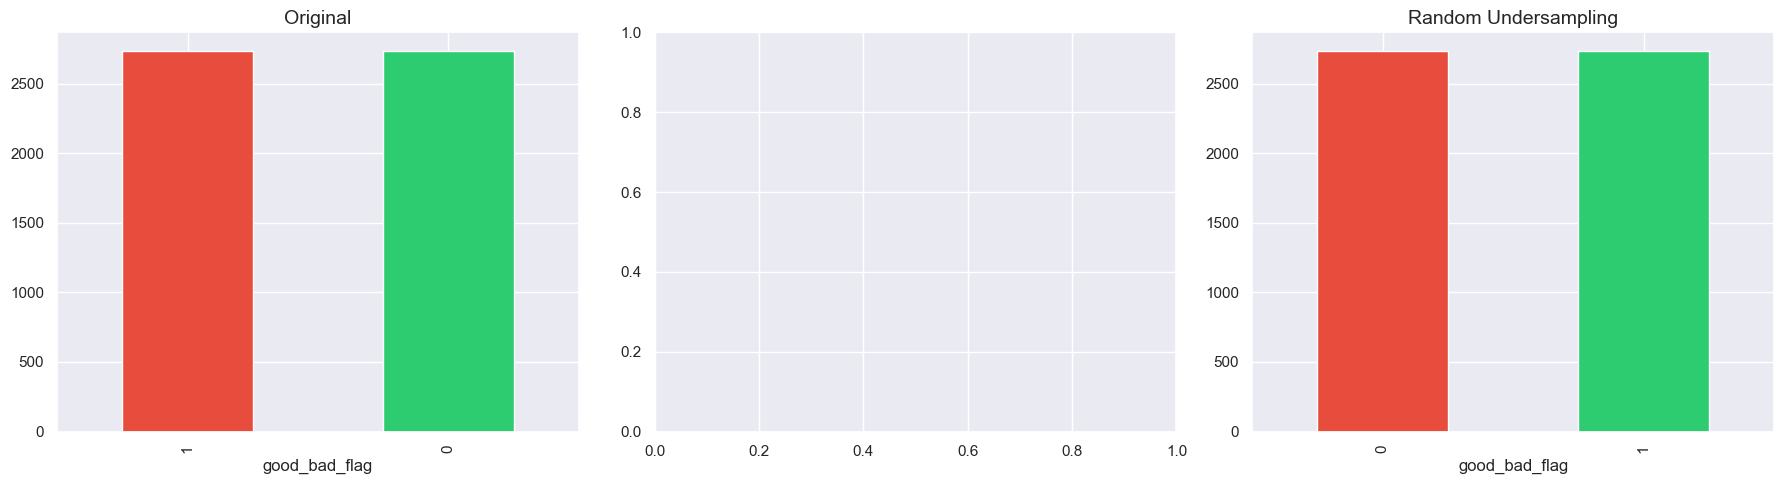

In [158]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

pd.Series(y_train).value_counts().plot(kind='bar', ax=axes[0], color=['#e74c3c', '#2ecc71'])
axes[0].set_title('Original', fontsize=14)

if 'y_train_smote' in locals():
    pd.Series(y_train_smote).value_counts().plot(kind='bar', ax=axes[1], color=['#e74c3c', '#2ecc71'])
    axes[1].set_title('BorderlineSMOTE', fontsize=14)

pd.Series(y_train_rus).value_counts().plot(kind='bar', ax=axes[2], color=['#e74c3c', '#2ecc71'])
axes[2].set_title('Random Undersampling', fontsize=14)

plt.tight_layout()
plt.show()

Model Selection. We are using
Since you want 3 different models, a common strategy is to cover different families:

1. Traditional / baseline model Logistic Regression
2. Tree-based model: Random Forest
3. Boosting model: XGBoost

In [159]:
## Feature Selection

# Implementing Chi-square and RFE methods.

In [160]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

k_features = min(20, X_train.shape[1])
chi2_selector = SelectKBest(chi2, k=k_features)
chi2_selector.fit(X_train_scaled, y_train)

chi2_support = chi2_selector.get_support()
chi2_features = X_train.columns[chi2_support].tolist()

print(f"Chi-square selected {len(chi2_features)} features")
print(chi2_features[:10])

Chi-square selected 20 features
['loannumber', 'loanamount', 'totaldue', 'systemloanid_count', 'loanamount_max', 'bank_account_type_Savings', 'bank_name_clients_EcoBank', 'bank_name_clients_FCMB', 'bank_name_clients_First Bank', 'bank_name_clients_GT Bank']


In [161]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

rf_estimator = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
rfe_selector = RFE(estimator=rf_estimator, n_features_to_select=k_features, step=1)
rfe_selector.fit(X_train, y_train)

rfe_support = rfe_selector.get_support()
rfe_features = X_train.columns[rfe_support].tolist()

print(f"RFE selected {len(rfe_features)} features")
print(rfe_features[:10])

RFE selected 20 features
['loannumber', 'loanamount', 'totaldue', 'termdays', 'systemloanid_count', 'loanamount_mean', 'totaldue_mean', 'termdays_mean', 'termdays_max', 'repayment_delay_mean']


In [162]:
chi2_set = set(chi2_features)
rfe_set = set(rfe_features)
overlap = chi2_set.intersection(rfe_set)

feature_sets = {
    'all_features': X_train.columns.tolist(),
    'chi2_features': chi2_features,
    'rfe_features': rfe_features,
    'common_features': list(overlap)
}

print(f"\nFeature sets created:")
for name, features in feature_sets.items():
    print(f"  {name}: {len(features)} features")


Feature sets created:
  all_features: 75 features
  chi2_features: 20 features
  rfe_features: 20 features
  common_features: 11 features


##### MODEL 1: LOGISTIC REGRESSION

In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Logistic Regression Pipeline
log_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=500))
])

# Train
log_reg.fit(X_train, y_train)

# Predict
y_pred_lr = log_reg.predict(X_val)
y_proba_lr = log_reg.predict_proba(X_val)[:, 1]

# Evaluation
print("=== Logistic Regression Results ===")
print(classification_report(y_val, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_val, y_proba_lr))
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred_lr))

=== Logistic Regression Results ===
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       684
           1       0.85      0.72      0.78       683

    accuracy                           0.80      1367
   macro avg       0.80      0.80      0.80      1367
weighted avg       0.80      0.80      0.80      1367

ROC-AUC Score: 0.8754195456919507

Confusion Matrix:
[[598  86]
 [191 492]]


MODEL 2: RANDOM FOREST CLASSIFIER

In [164]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Random Forest
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    random_state=42,
    n_jobs=-1
)

# Train
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_val)
y_proba_rf = rf.predict_proba(X_val)[:, 1]

# Evaluation
print("=== Random Forest Results ===")
print(classification_report(y_val, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_val, y_proba_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred_rf))

=== Random Forest Results ===
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       684
           1       0.86      0.83      0.84       683

    accuracy                           0.85      1367
   macro avg       0.85      0.85      0.85      1367
weighted avg       0.85      0.85      0.85      1367

ROC-AUC Score: 0.9078690503711696

Confusion Matrix:
[[593  91]
 [118 565]]


##### XGBOOST CLASSIFIER

In [165]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# XGBoost
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42,
    eval_metric="logloss"
)

# Train
xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb.predict(X_val)
y_proba_xgb = xgb.predict_proba(X_val)[:, 1]

# Evaluation
print("=== XGBoost Results ===")
print(classification_report(y_val, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_val, y_proba_xgb))
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred_xgb))


=== XGBoost Results ===
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       684
           1       0.85      0.74      0.79       683

    accuracy                           0.81      1367
   macro avg       0.81      0.81      0.81      1367
weighted avg       0.81      0.81      0.81      1367

ROC-AUC Score: 0.8982676615893076

Confusion Matrix:
[[598  86]
 [179 504]]


<a id='results'></a>

## 7.0 EVALUATION & COMPARISON
1. Compare Metrics using Metrics : Accuracy, Precision, Recall, F1-score, ROC-AUC and confusion matrix
2. Conclude: Decide which model performs best for our specific goal and Justify choice using metics.
3. Save Model

In [166]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# List of models and their predictions
models = ["Logistic Regression", "Random Forest", "XGBoost"]
preds = [y_pred_lr, y_pred_rf, y_pred_xgb]      # predicted labels
probas = [y_proba_lr, y_proba_rf, y_proba_xgb]  # predicted probabilities

# Create an empty list to store results
results = []

# Loop over models to calculate metrics
for i, model in enumerate(models):
    y_pred = preds[i]
    y_proba = probas[i]
    
    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
    
    # Classification report
    report = classification_report(y_val, y_pred, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']
    
    # Accuracy & ROC-AUC
    acc = accuracy_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_proba)
    
    results.append({
        "Model": model,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "Accuracy": acc,
        "ROC-AUC": roc_auc,
        "TP": tp,
        "TN": tn,
        "FP": fp,
        "FN": fn
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Display nicely
results_df


,Model,Precision,Recall,F1-score,Accuracy,ROC-AUC,TP,TN,FP,FN
0,Logistic Regression,0.804532,0.797366,0.796152,0.797366,0.875420,492,598,86,191
1,Random Forest,0.847649,0.847110,0.847049,0.847110,0.907869,565,593,91,118
2,XGBoost,0.811901,0.806145,0.805234,0.806145,0.898268,504,598,86,179


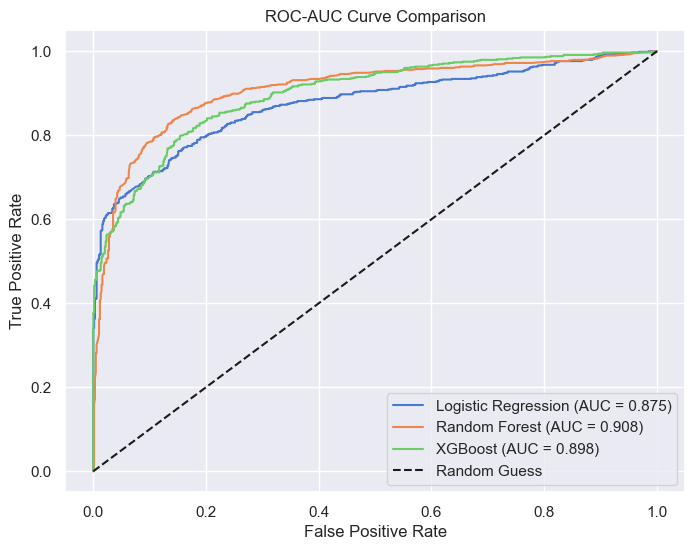

In [167]:
from sklearn.metrics import roc_curve, roc_auc_score

model_names = ["Logistic Regression", "Random Forest", "XGBoost"]
y_probs = [y_proba_lr, y_proba_rf, y_proba_xgb]

plt.figure(figsize=(8,6))
for i, y_prob in enumerate(y_probs):
    fpr, tpr, _ = roc_curve(y_val, y_prob)
    auc = roc_auc_score(y_val, y_prob)
    plt.plot(fpr, tpr, label=f"{model_names[i]} (AUC = {auc:.3f})")

plt.plot([0,1], [0,1], 'k--', label="Random Guess")
plt.title("ROC-AUC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


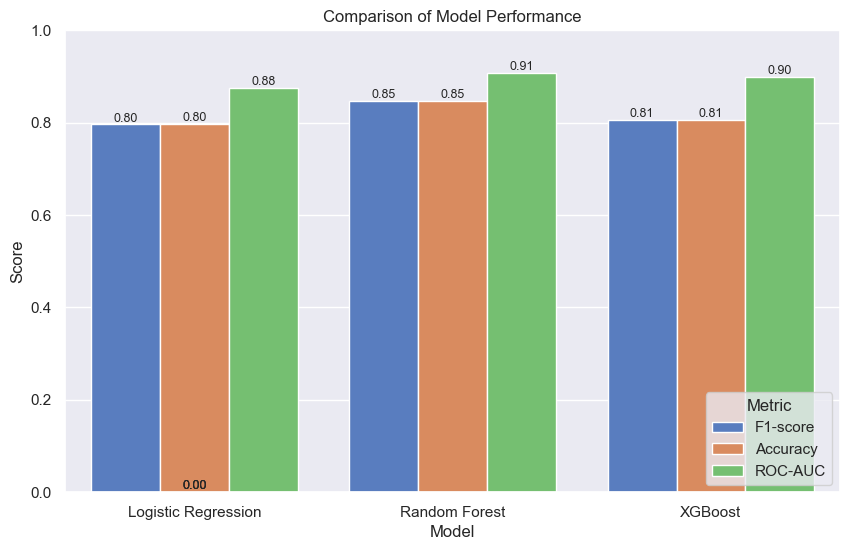

In [168]:
# Select the metrics you want to plot
metrics = ['F1-score', 'Accuracy', 'ROC-AUC']

# Prepare data for plotting
plot_df = results_df.melt(id_vars='Model', value_vars=metrics,
                          var_name='Metric', value_name='Score')

# Create grouped bar chart
plt.figure(figsize=(10,6))
sns.barplot(data=plot_df, x='Model', y='Score', hue='Metric')

# Add title and labels
plt.title('Comparison of Model Performance')
plt.ylim(0, 1)  # since all metrics are between 0 and 1
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(title='Metric')

# Annotate bars with actual values
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.2f}', 
                       (p.get_x() + p.get_width() / 2., height), 
                       ha='center', va='bottom', fontsize=9)

plt.show()

##### Conclusion

*Random Forest* showed the Best performance in above observed metrics

In [169]:
## Comprehensive Model Comparison

#Training 36 configurations: 3 samplings × 4 feature sets × 3 models

In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1, eval_metric='logloss')
}

sampling_strategies = {'Original': (X_train, y_train)}
if 'X_train_smote' in locals():
    sampling_strategies['BorderlineSMOTE'] = (X_train_smote, y_train_smote)
if 'X_train_rus' in locals():
    sampling_strategies['Random Undersampling'] = (X_train_rus, y_train_rus)

results = []

print(f"Training {len(sampling_strategies)} × {len(feature_sets)} × {len(models)} = {len(sampling_strategies) * len(feature_sets) * len(models)} configurations\n")

for sampling_name, (X_samp, y_samp) in sampling_strategies.items():
    for feature_name, features in feature_sets.items():
        X_train_subset = X_samp[features] if isinstance(X_samp, pd.DataFrame) else pd.DataFrame(X_samp, columns=X_train.columns)[features]
        X_val_subset = X_val[features]
        
        for model_name, model in models.items():
            try:
                model.fit(X_train_subset, y_samp)
                y_pred = model.predict(X_val_subset)
                y_pred_proba = model.predict_proba(X_val_subset)[:, 1]
                
                results.append({
                    'Sampling': sampling_name,
                    'Features': feature_name,
                    'Model': model_name,
                    'F1-Score': f1_score(y_val, y_pred, zero_division=0),
                    'ROC-AUC': roc_auc_score(y_val, y_pred_proba),
                    'Precision': precision_score(y_val, y_pred, zero_division=0),
                    'Recall': recall_score(y_val, y_pred, zero_division=0),
                    'Accuracy': accuracy_score(y_val, y_pred)
                })
                print(f"✓ {sampling_name:20s} | {feature_name:20s} | {model_name:20s}")
            except Exception as e:
                print(f"✗ {sampling_name:20s} | {feature_name:20s} | {model_name:20s} | {str(e)[:30]}")

print(f"\n Trained {len(results)} configurations")

Training 2 × 4 × 3 = 24 configurations

✓ Original             | all_features         | Logistic Regression 
✓ Original             | all_features         | Random Forest       
✓ Original             | all_features         | XGBoost             
✓ Original             | chi2_features        | Logistic Regression 
✓ Original             | chi2_features        | Random Forest       
✓ Original             | chi2_features        | XGBoost             
✓ Original             | rfe_features         | Logistic Regression 
✓ Original             | rfe_features         | Random Forest       
✓ Original             | rfe_features         | XGBoost             
✓ Original             | common_features      | Logistic Regression 
✓ Original             | common_features      | Random Forest       
✓ Original             | common_features      | XGBoost             
✓ Random Undersampling | all_features         | Logistic Regression 
✓ Random Undersampling | all_features         | Random Forest  

In [171]:
results_df = pd.DataFrame(results)

print("="*70)
print("TOP 10 CONFIGURATIONS (by F1-Score)")
print("="*70)
print(results_df.nlargest(10, 'F1-Score')[['Sampling', 'Features', 'Model', 'F1-Score', 'ROC-AUC']])

best = results_df.loc[results_df['F1-Score'].idxmax()]
print(f"\nBEST MODEL:")
print(f"  Sampling: {best['Sampling']}")
print(f"  Features: {best['Features']}")
print(f"  Model: {best['Model']}")
print(f"  F1-Score: {best['F1-Score']:.4f}")
print(f"  ROC-AUC: {best['ROC-AUC']:.4f}")

TOP 10 CONFIGURATIONS (by F1-Score)
                Sampling       Features          Model  F1-Score   ROC-AUC
7               Original   rfe_features  Random Forest  0.845316  0.900159
13  Random Undersampling   all_features  Random Forest  0.840386  0.903633
1               Original   all_features  Random Forest  0.840299  0.906329
19  Random Undersampling   rfe_features  Random Forest  0.839039  0.897814
14  Random Undersampling   all_features        XGBoost  0.834457  0.911647
2               Original   all_features        XGBoost  0.828829  0.908641
20  Random Undersampling   rfe_features        XGBoost  0.827893  0.906694
8               Original   rfe_features        XGBoost  0.827483  0.910647
5               Original  chi2_features        XGBoost  0.754023  0.850343
16  Random Undersampling  chi2_features  Random Forest  0.748687  0.833476

BEST MODEL:
  Sampling: Original
  Features: rfe_features
  Model: Random Forest
  F1-Score: 0.8453
  ROC-AUC: 0.9002


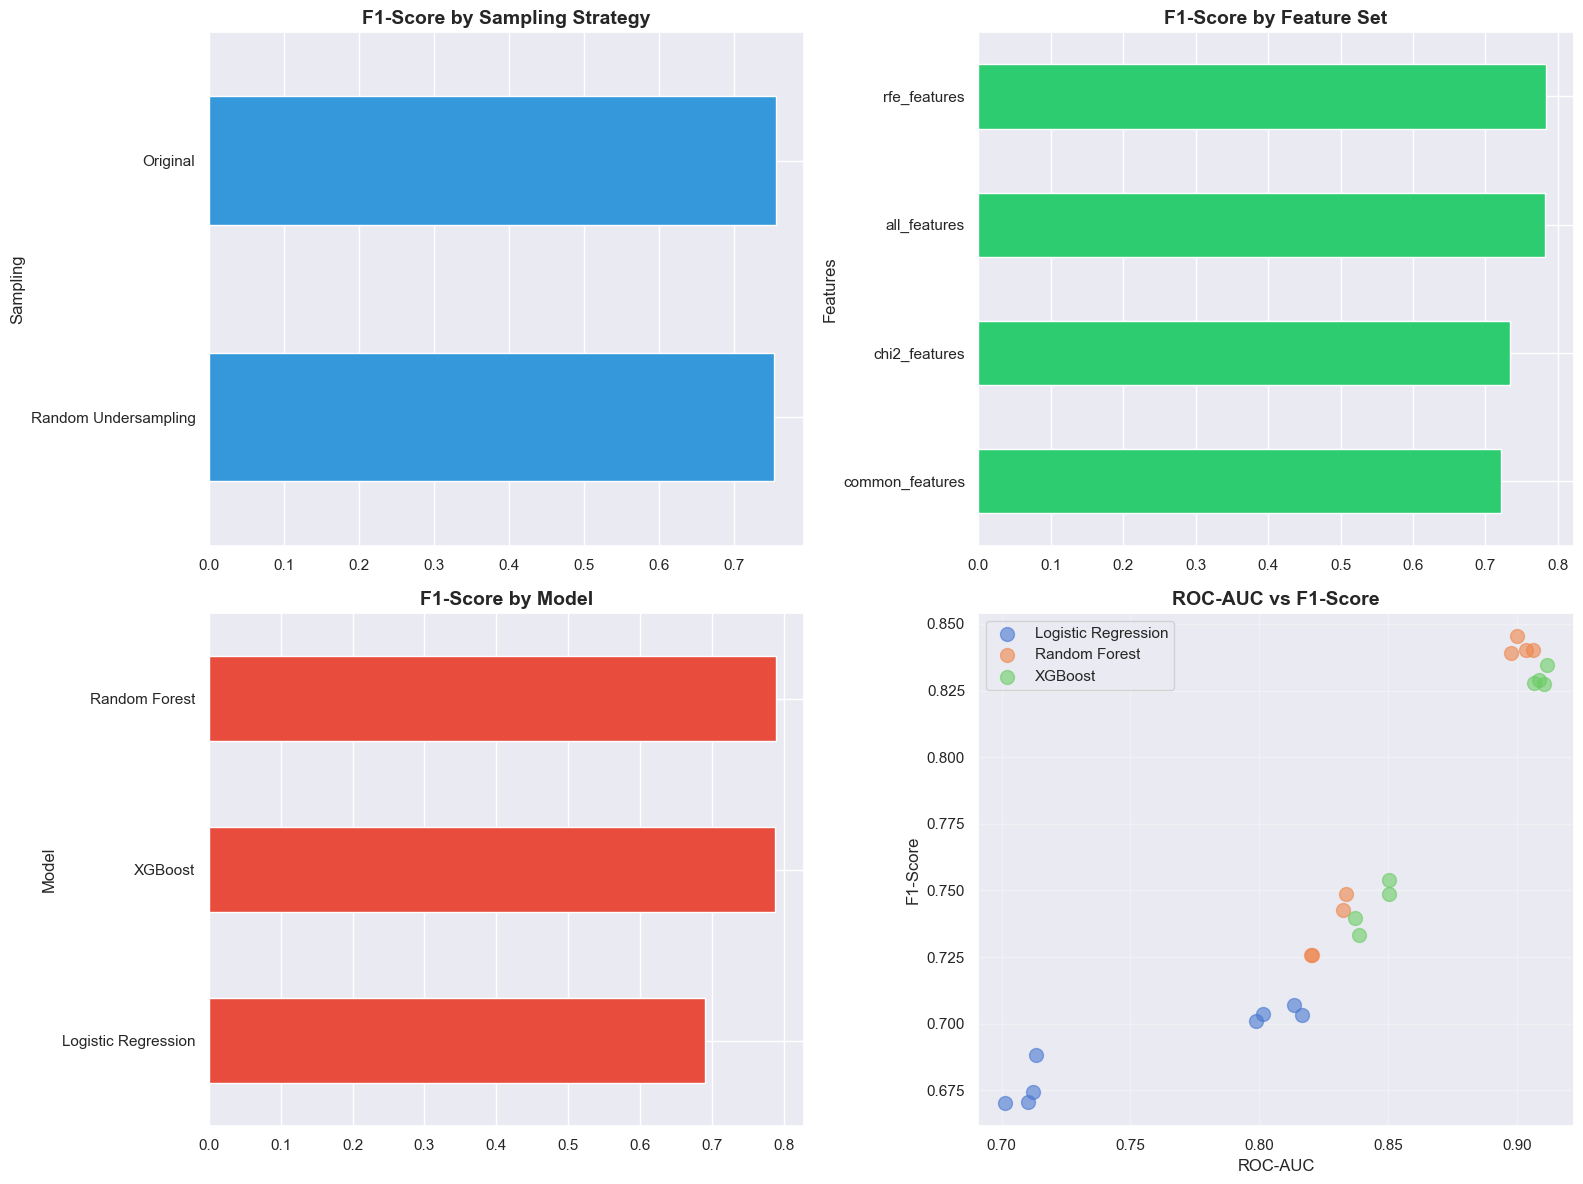

In [172]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

results_df.groupby('Sampling')['F1-Score'].mean().sort_values().plot(kind='barh', ax=axes[0,0], color='#3498db')
axes[0,0].set_title('F1-Score by Sampling Strategy', fontsize=14, fontweight='bold')

results_df.groupby('Features')['F1-Score'].mean().sort_values().plot(kind='barh', ax=axes[0,1], color='#2ecc71')
axes[0,1].set_title('F1-Score by Feature Set', fontsize=14, fontweight='bold')

results_df.groupby('Model')['F1-Score'].mean().sort_values().plot(kind='barh', ax=axes[1,0], color='#e74c3c')
axes[1,0].set_title('F1-Score by Model', fontsize=14, fontweight='bold')

for model in results_df['Model'].unique():
    data = results_df[results_df['Model'] == model]
    axes[1,1].scatter(data['ROC-AUC'], data['F1-Score'], label=model, alpha=0.6, s=100)
axes[1,1].set_xlabel('ROC-AUC')
axes[1,1].set_ylabel('F1-Score')
axes[1,1].set_title('ROC-AUC vs F1-Score', fontsize=14, fontweight='bold')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

<a id='model'></a>

## Saving Final Model
Saving model trained model.

In [173]:
joblib.dump(rf, "loan_model.pkl")

['loan_model.pkl']

<a id='end'></a> 

![banner-image](assets/footer.png)

<li><a href='#top'>Back to top</a></li>